### **Hierarchical Clustering on E-commerce Data**
 **Goal:** Use hierarchical clustering to group similar customers or products based on features like purchase frequency, average spend, or product attributes.

**Simulate E-commerce Customer Data**:

We'll simulate customer metrics like total spend, purchase frequency, and average cart value.

In [1]:
import pandas as pd
import numpy as np
# Simulate 100 customers
np.random.seed(42)
n_customers = 100
df = pd.DataFrame({
'total_spent': np.random.normal(1000, 250, n_customers),
'purchase_frequency': np.random.poisson(10, n_customers),
'avg_cart_value': np.random.normal(100, 20, n_customers)
})
df.head()

,total_spent,purchase_frequency,avg_cart_value
0,1124.178538,9,126.109576
1,965.433925,6,100.420077
2,1161.922135,16,113.639059
3,1380.757464,10,93.794665
4,941.461656,18,106.483327


**Normalize Features**

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

**Apply Hierarchical Clustering**

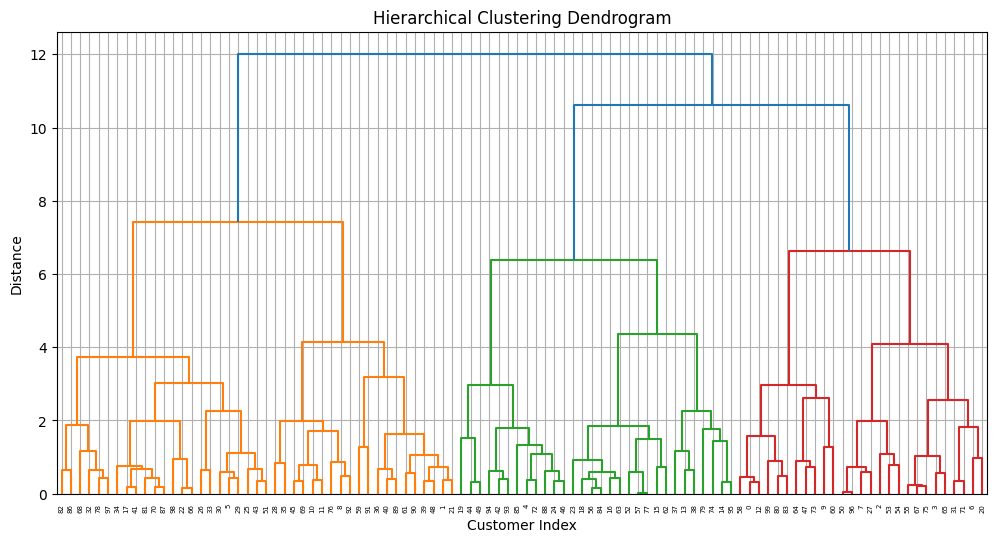

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Compute linkage matrix using Ward's method
Z = linkage(X_scaled, method='ward')
# Plot dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

**Assign Cluster Labels**

In [4]:
from scipy.cluster.hierarchy import fcluster
# Create flat clusters by cutting dendrogram at a height
df['cluster'] = fcluster(Z, t=3, criterion='maxclust')  # 3 clusters

**Visualize Clusters**

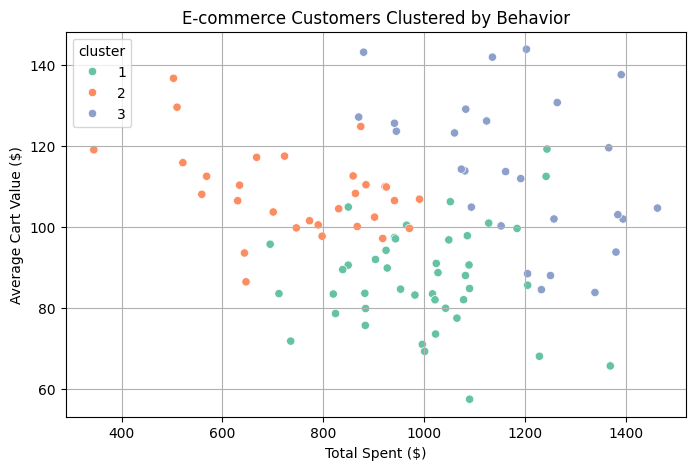

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total_spent vs. avg_cart_value with clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='total_spent', y='avg_cart_value', hue='cluster', palette='Set2')
plt.title("E-commerce Customers Clustered by Behavior")
plt.xlabel("Total Spent ($)")
plt.ylabel("Average Cart Value ($)")
plt.grid(True)
plt.show()

### 📊 Project Summary: Hierarchical Clustering on E-commerce Customer Data

In this project, we applied **hierarchical clustering** to segment e-commerce customers based on behavioral features like `total_spent`, `purchase_frequency`, and `avg_cart_value`.

We simulated data for 100 customers, normalized it using `StandardScaler`, and then used **Ward's method** to compute the linkage matrix. A **dendrogram** was plotted to visualize the clustering hierarchy.

Finally, we cut the dendrogram to form 3 distinct customer clusters and visualized them using a scatter plot. This helps businesses understand different customer groups for targeted marketing and personalization.
